In [ ]:
import pickle as pkl
import pandas as pd
import aegnn
import torch
import torch_geometric

import argparse
import logging
import os
import numpy as np
import pandas as pd
import pytorch_lightning.metrics.functional as pl_metrics

from torch_geometric.data import Batch
from torch_geometric.utils import subgraph
from typing import Iterable, Tuple

from torch_geometric.data import Data
from tqdm import tqdm
from typing import List
from torch.nn import Linear
from torch.nn.functional import elu
from torch_geometric.nn.conv import SplineConv
from torch_geometric.nn.norm import BatchNorm
from torch_geometric.transforms import Cartesian

For 4000 samples, wrt their own events/nodes:
```
acc_Mflop_per_ev = 134.74224981457488, avg_Mflop_per_ev = 0.03368556245364372
dense: std acc_Mflop_per_ev = 1170.527851753108, std avg_Mflop_per_ev = 0.29263196293827703
```

For 100 samples, wrt their own events/nodes:
```
acc_Mflop_per_ev = 3.414027443525552, avg_Mflop_per_ev = 0.034140274435255524
dense: std acc_Mflop_per_ev = 28.595094207357473, std avg_Mflop_per_ev = 0.28595094207357474
```

Corrected formula for calculating FLOPS (according to updated paper), leading to:

For 4000 samples, wrt their own events/nodes:
```
acc_Mflop_per_ev = 240.93893365788432, avg_Mflop_per_ev = 0.06023473341447108
dense: std acc_Mflop_per_ev = 2096.876591199398, std avg_Mflop_per_ev = 0.5242191477998495
```

In [ ]:
data_module = aegnn.datasets.NCars(batch_size=1, shuffle=False)
data_module.setup()
dm = data_module.train_dataset

# cnt = 0
# for i, dms in enumerate(dm):
#     cnt += 1
#     print(i)

# print(cnt)

# num_trials=100
# nodes=[]
# nodes_cnt=0
# for index in tqdm(range(num_trials)):
#     sample = dm[index % len(dm)]
#     nodes.append(sample.num_nodes)
#     nodes_cnt += sample.num_nodes
# print(nodes_cnt)

print(dm.dims)

if add async code into train.py
```
File "scripts/train.py", line 97, in <module>
    main(arguments)
  File "scripts/train.py", line 91, in main
    trainer.fit(model, datamodule=dm)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 552, in fit
    self._run(model)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 922, in _run
    self._dispatch()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 990, in _dispatch
    self.accelerator.start_training(self)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/accelerators/accelerator.py", line 92, in start_training
    self.training_type_plugin.start_training(trainer)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/plugins/training_type/training_type_plugin.py", line 161, in 
start_training
    self._results = trainer.run_stage()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 1000, in run_stage
    return self._run_train()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 1049, in _run_train
    self.fit_loop.run()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/base.py", line 111, in run
    self.advance(*args, **kwargs)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/fit_loop.py", line 200, in advance
    epoch_output = self.epoch_loop.run(train_dataloader)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/base.py", line 118, in run
    output = self.on_run_end()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/training_epoch_loop.py", line 235, in on_run_end
    self._on_train_epoch_end_hook(processed_outputs)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/training_epoch_loop.py", line 276, in _on_train_epoch_end_hook
    trainer_hook(processed_epoch_output)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/callback_hook.py", line 109, in on_train_epoch_end
    callback.on_train_epoch_end(self, self.lightning_module)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py", line 310, in on_train_epoch_end  
    self.save_checkpoint(trainer)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py", line 386, in save_checkpoint
    self._save_none_monitor_checkpoint(trainer, monitor_candidates)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py", line 742, in _save_none_monitor_checkpoint
    self._save_model(trainer, filepath)
  File "/users/yyang22/thesis/aegnn_project/aegnn/aegnn/utils/callbacks/checkpoint_full_model.py", line 14, in _save_model
    torch.save(trainer.model, filepath)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/torch/serialization.py", line 380, in save
    _save(obj, opened_zipfile, pickle_module, pickle_protocol)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/torch/serialization.py", line 589, in _save
    pickler.dump(obj)
AttributeError: Can't pickle local object 'make_model_asynchronous.<locals>.async_forward'
```

if I use wandb:
```
File "scripts/train.py", line 97, in <module>
    main(arguments)
  File "scripts/train.py", line 91, in main
    trainer.fit(model, datamodule=dm)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 552, in fit
    self._run(model)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 922, in _run
    self._dispatch()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 990, in _dispatch
    self.accelerator.start_training(self)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/accelerators/accelerator.py", line 92, in start_training
    self.training_type_plugin.start_training(trainer)  
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/plugins/training_type/training_type_plugin.py", line 161, in 
start_training
    self._results = trainer.run_stage()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 1000, in run_stage
    return self._run_train()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py", line 1049, in _run_train
    self.fit_loop.run()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/base.py", line 111, in run
    self.advance(*args, **kwargs)
File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/fit_loop.py", line 200, in advance
    epoch_output = self.epoch_loop.run(train_dataloader)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/base.py", line 118, in run
    output = self.on_run_end()
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/training_epoch_loop.py", line 235, in on_run_end
    self._on_train_epoch_end_hook(processed_outputs)   
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/loops/epoch/training_epoch_loop.py", line 276, in _on_train_e
poch_end_hook
    trainer_hook(processed_epoch_output)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/trainer/callback_hook.py", line 109, in on_train_epoch_end
    callback.on_train_epoch_end(self, self.lightning_module)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py", line 310, in on_train_epoch_end
    self.save_checkpoint(trainer)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py", line 386, in save_checkpoint
    self._save_none_monitor_checkpoint(trainer, monitor_candidates)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py", line 742, in _save_none_monitor_checkpoint
    self._save_model(trainer, filepath)
  File "/users/yyang22/thesis/aegnn_project/aegnn/aegnn/utils/callbacks/checkpoint_full_model.py", line 14, in _save_model
    torch.save(trainer.model, filepath)
File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/torch/serialization.py", line 380, in save
    _save(obj, opened_zipfile, pickle_module, pickle_protocol)
  File "/users/yyang22/anaconda3/envs/aegnn/lib/python3.8/site-packages/torch/serialization.py", line 589, in _save
    pickler.dump(obj)
AttributeError: Can't pickle local object 'Settings._validator_factory.<locals>.helper'
```
Problems seem to be at logger function

In [ ]:
import wandb
from wandb import sdk as wandb_sdk

wandb.init(project="aegnn", entity="yyfteam")
# log_settings = wandb.Settings(start_method="thread")
log_settings = wandb.Settings(start_method="fork")
wandb_sdk.Settings()

In [ ]:
import aegnn
import torch
import torch_geometric

edge_attr = torch_geometric.transforms.Cartesian(cat=False, max_value=10.0)

print(type(edge_attr))

In [ ]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR

initial_lr = 0.5



class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net_1 = model()

def LRPolicy(epoch):
    if epoch < 2:
        return 1
    else:
        return 0.1

optimizer_1 = torch.optim.Adam(net_1.parameters(), lr = initial_lr)
scheduler_1 = LambdaLR(optimizer_1, lr_lambda=LRPolicy)

print("init lr", optimizer_1.defaults['lr'])

for epoch in range(1, 11):
    # train
    optimizer_1.zero_grad()
    optimizer_1.step()
    print("lr of %dth epoch: %f" % (epoch, optimizer_1.param_groups[0]['lr']))
    scheduler_1.step()

In [ ]:
import os
import shutil
import glob
import sys

path='../aegnn_results/training_results/latest'
if not os.path.exists(path):
    os.makedirs(path)
else:
    # clean
    try:
        shutil.rmtree(path)
    except OSError as e:
        print("Error: %s : %s" % (path, e.strerror))
    
    # rebuild
    os.makedirs(path)

src_model = sorted(glob.glob(r'/space/yyang22/datasets/data/scratch/checkpoints/ncars/recognition/*/*.pt'), key=os.path.getctime)[-1]
dst_model = os.path.join(path,'latest_model.pt')

src_log = sorted(glob.glob(r'/space/yyang22/datasets/data/scratch/debug/*'), key=os.path.getctime)[-1]
dst_log = os.path.join(path,'latest.log')

print(src_model,dst_model,src_log,dst_log)
try:
    shutil.copy2(src_model, dst_model)
except IOError as e:
    print("Unable to copy file. %s" % e)
except:
    print("Unexpected error:", sys.exc_info())

try:
    shutil.copy2(src_log, dst_log)
except IOError as e:
    print("Unable to copy file. %s" % e)
except:
    print("Unexpected error:", sys.exc_info())





In [ ]:
import os

cmd = 'python3 ../../test_bkgnd.py'
os.system(cmd)

In [28]:
import torch
import torch_geometric
import aegnn
from torch_geometric.nn.conv import GCNConv

class GraphRes(torch.nn.Module):
    def __init__(self, cin, cout):
        super(GraphRes, self).__init__()
        self.conv1 = GCNConv(cin, cout)

    def forward(self, data: torch_geometric.data.Batch) -> torch.Tensor:
        data.x = self.conv1(data.x, data.edge_index)
        return data

edge_attr = torch.tensor([[0.0,0.0,0.0]])

edge_index1 = torch.tensor([[0,1,1,2],[1,0,2,1]], dtype=torch.long)
x1 = torch.tensor([[1.0],[2.0],[3.0]])
pos1 = torch.tensor([0.,0.,0., 1.,1.,0., 2.,0.,0.]).view(3,3)
g1 = torch_geometric.data.Data(x=x1, edge_index=edge_index1, pos=pos1, edge_attr=edge_attr)
print(g1)

edge_index2 = torch.tensor([[0,1],[1,0]], dtype=torch.long)
x2 = torch.tensor([[4.0],[5.0]])
pos2 = torch.tensor([0.,0.,1., 1.,1.,1.]).view(2,3)
g2 = torch_geometric.data.Data(x=x2, edge_index=edge_index2, pos=pos2, edge_attr=edge_attr)
print(g2)

g = torch_geometric.data.Batch.from_data_list([g1,g2])
print(g.x)
print(g.edge_index)
print(g.batch)

g1 = g1.to(torch.device('cuda'))
g2 = g2.to(torch.device('cuda'))
g = g.to(torch.device('cuda'))
net1 = GraphRes(1,4)
# model_file = '/users/yyang22/thesis/aegnn_project/aegnn_results/training_results/checkpoints/ncars/recognition/20221125084923/epoch=99-step=20299.pt'
# net1 = torch.load(model_file).to(torch.device('cuda'))
# net1 = aegnn.models.networks.graph_res.GraphRes('ncars',)

out1 = net1(g1)
out2 = net1(g2)
out = net1(g)

# for param in net1.parameters():
#     print(param)

print(out1.x)
print(out2.x)
print(out.x)

Data(x=[3, 1], edge_index=[2, 4], edge_attr=[1, 3], pos=[3, 3])
Data(x=[2, 1], edge_index=[2, 2], edge_attr=[1, 3], pos=[2, 3])
tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
tensor([[0, 1, 1, 2, 3, 4],
        [1, 0, 2, 1, 4, 3]])
tensor([0, 0, 0, 1, 1])


TypeError: __init__() missing 3 required positional arguments: 'dataset', 'input_shape', and 'num_outputs'

``CUDA_VISIBLE_DEVICES=5 wandb agent --count 4 yyfteam/aegnn/yzqyfzg6``

in preprocessing.py, order of calling:

``ncars``

-> ``event_dm.py: prepare_data(self)`` --> ``_prepare_dataset(self)``

--> ``ncaltech101.py: _prepare_dataset(self)`` ---> ``processing()@static (parallel)``

---> 

 + ``ncars.py: load()@static``  : from text, read ``[x,y,t,p(0/1)]``
  + ``ncars.py: read_label()@static``  : 0=car, 1=background; data.label = name, data.y = value
 + ``ncars.py: pre_transform(self)`` 

   -----> 
   + ``.util.normalization.py: normalize_time()`` : ``t_new = (ts - torch.min(ts)) * beta``, beta: float = 0.5e-5
   + ``ncaltech101.py: sub_sampling()@static``

    &nbsp;&nbsp; ------>
    
    &nbsp;&nbsp; + ``from torch_geometric.transforms import FixedPoints``: ``FixedPoints(num=10000, allow_duplicates=False, replace=False)`` : will shuffle and subsample events in a event stream !
    
   + ``from torch_geometric.nn.pool import radius_graph`` : add edge_index by radius_graph

 

In [87]:
import torch
import torch_geometric
from torch_geometric.data import Data
import pytorch_lightning as pl
import numpy as np
import aegnn
import os
from typing import Callable, List, Optional, Union

# torch.cuda.set_device(5)

pl.seed_everything(12345)

def load(raw_file: str) -> Data:
    events_file = os.path.join(raw_file, "events.txt")
    events = torch.from_numpy(np.loadtxt(events_file)).float().cuda()
    x, pos = events[:, -1:], events[:, :3]
    return Data(x=x, pos=pos)

def read_label(raw_file: str) -> Optional[Union[str, List[str]]]:
    label_file = os.path.join(raw_file, "is_car.txt")
    with open(label_file, "r") as f:
        label_txt = f.read().replace(" ", "").replace("\n", "")
    return "car" if label_txt == "1" else "background"


class_dict = {class_id: i for i, class_id in enumerate(["car", "background"])}  # here, car=0, background=1. I dont know why...
raw_file = '/space/yyang22/datasets/data/storage/ncars/training/sequence_0/'
# raw_file = '/space/yyang22/datasets/data/storage/ncars/training/sequence_1118/'

# load x, pos
event_data = load(raw_file)

# load label name and label value
if (label := read_label(raw_file)) is not None:
    event_data.label = label if isinstance(label, list) else [label]
    event_data.y = torch.tensor([class_dict[label] for label in event_data.label])

print(event_data)
print(event_data.x.T)
print(event_data.pos)
print(event_data.pos[:,-1])
print(event_data.label)
print(event_data.y)

Global seed set to 12345


RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [83]:
from torch_geometric.transforms import FixedPoints
def sub_sampling(data: Data, n_samples: int, sub_sample: bool) -> Data:
    if sub_sample:
        sampler = FixedPoints(num=n_samples, allow_duplicates=False, replace=False)
        return sampler(data)
    else:
        sample_idx = np.arange(n_samples)
        for key, item in data:
            if torch.is_tensor(item) and item.size(0) != 1:
                data[key] = item[sample_idx]
        return data

# event_data = sub_sampling(event_data, 10000, True)
event_data = sub_sampling(event_data, 10000, False)

print(event_data)
print(event_data.x.T)
print(event_data.pos)
print(event_data.pos[:,-1])
print(event_data.label)
print(event_data.y)

print(torch.min(event_data.pos[:,-1]))
print(torch.max(event_data.pos[:,-1]))


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [75]:
event_data.pos[:, 2] = (event_data.pos[:, 2] - torch.min(event_data.pos[:, 2])) * 0.5e-5
print(event_data.pos)
print(torch.min(event_data.pos[:,0]))
print(torch.max(event_data.pos[:,0]))

print(torch.min(event_data.pos[:,1]))
print(torch.max(event_data.pos[:,1]))

print(torch.min(event_data.pos[:,2]))
print(torch.max(event_data.pos[:,2]))

tensor([[6.0000e+00, 1.9000e+01, 1.4963e-07],
        [7.0000e+00, 3.6000e+01, 2.1136e-07],
        [6.6000e+01, 1.1000e+01, 3.2841e-07],
        ...,
        [2.5000e+01, 2.7000e+01, 4.7212e-07],
        [3.0000e+00, 7.0000e+00, 4.8742e-07],
        [2.0000e+00, 1.1000e+01, 2.3369e-07]], device='cuda:1')
tensor(0., device='cuda:1')
tensor(79., device='cuda:1')
tensor(0., device='cuda:1')
tensor(42., device='cuda:1')
tensor(0., device='cuda:1')
tensor(4.9966e-07, device='cuda:1')


In [76]:
from torch_geometric.nn.pool import radius_graph
event_data.edge_index = radius_graph(event_data.pos, r=3.0, max_num_neighbors=32)
print(event_data.edge_index)

tensor([[  28,   59,   70,  ..., 4625, 4827, 4907],
        [   0,    0,    0,  ..., 6262, 6262, 6262]], device='cuda:1')


In [77]:
processed = '/space/yyang22/datasets/data/storage/ncars/processed/training/sequence_0'
data2 = torch.load(processed).to(torch.device('cuda'))
print(data2)
print(data2.pos)
print(data2.label)
print(data2.y)
print(torch.min(data2.pos[:,0]))
print(torch.max(data2.pos[:,0]))

print(torch.min(data2.pos[:,1]))
print(torch.max(data2.pos[:,1]))

print(torch.min(data2.pos[:,2]))
print(torch.max(data2.pos[:,2]))
print(data2.edge_index)

Data(x=[6263, 1], pos=[6263, 3], file_id='sequence_0', label=[1], y=[1], edge_index=[2, 190656])
tensor([[2.3000e+01, 2.6000e+01, 2.4466e-07],
        [3.0000e+01, 3.6000e+01, 1.0063e-07],
        [2.0000e+01, 1.7000e+01, 4.7357e-07],
        ...,
        [4.1000e+01, 9.0000e+00, 3.6295e-08],
        [1.9000e+01, 1.9000e+01, 3.9599e-07],
        [2.0000e+01, 3.0000e+00, 4.7259e-07]], device='cuda:1')
['car']
tensor([0], device='cuda:1')
tensor(0., device='cuda:1')
tensor(79., device='cuda:1')
tensor(0., device='cuda:1')
tensor(42., device='cuda:1')
tensor(0., device='cuda:1')
tensor(4.9966e-07, device='cuda:1')
tensor([[2739, 5759, 6107,  ..., 3643, 4029, 1174],
        [   0,    0,    0,  ..., 6262, 6262, 6262]], device='cuda:1')


In [3]:
import torch
from torch import Tensor
from torch_geometric.data import Data

def fixed_voxel_grid(pos: Tensor, full_shape: Tensor, size: Tensor, batch: Tensor = None) -> Tensor:

    # device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    device = torch.device('cpu')

    # params and check
    node_dims = pos.size(1)
    num_nodes = pos.size(0)
    assert len(full_shape) == node_dims
    assert len(size)==node_dims or len(size)==1

    # batch is None when a single sample
    if batch is None:
        batch = torch.zeros(num_nodes, dtype=torch.long)

    # counting how many grids in each dimension, upward ceiling
    num_grids = torch.squeeze(torch.ceil(torch.div(full_shape, size)))

    # according to node's pos, calculating its idx (x,y,z,...) in grids
    idx = torch.div(pos, size, rounding_mode='floor')
    # batch is natually the batch_size idx; transposition for later matmul
    idx = torch.cat([idx, batch.view(-1,1)], dim=1).T

    # calculating accumulated indices: for grids with (A,B,C,..) voxels idx, and point (x,y,z,...)
    # the accumulated indices are: (1,A,AB,ABC,...)
    acc_idx = torch.ones(node_dims+1, device=device)
    for i in range(node_dims):
        acc_idx[i+1] = acc_idx[i] * num_grids[i]

    # final index is x*1 + y*A + z*AB + ...., which equals to a vector times the idx
    cluster = (acc_idx @ idx).type(torch.long)

    return cluster


pos = torch.tensor([0.1,0.1, 0.2,0.2, 0.3,0.3, 0.1,0.9], dtype=torch.float).view(-1,2) 
full_shape = torch.ones(2, dtype=torch.float)
size = torch.tensor([0.5,0.5], dtype=torch.float).view(-1,2) 
# batch = torch.tensor([0,0,1,2], dtype=torch.long)
batch = None

pos1 = torch.tensor([0.1,0.1,1, 0.2,0.2,1, 0.3,0.3,1, 0.1,0.9,1], dtype=torch.float).view(-1,3)
pos2 = torch.tensor([0.6,0.6,1, 0.7,0.7,1, 0.8,0.8,1], dtype=torch.float).view(-1,3)

print(fixed_voxel_grid(pos1[:, :2], full_shape, size, batch=batch))
print('')
print(fixed_voxel_grid(pos2[:, :2], full_shape, size, batch=batch))

pos3 = torch.cat([pos1, pos2])
batch1 = torch.tensor([0,0,0,0,1,1,1], dtype=torch.long)
print(fixed_voxel_grid(pos3[:, :2], full_shape, size, batch=batch1))



tensor([0, 0, 0, 2])

tensor([3, 3, 3])
tensor([0, 0, 0, 2, 7, 7, 7])


In [5]:
import torch
import torch_geometric
from torch_geometric.data import Data
import pytorch_lightning as pl
import numpy as np
import aegnn
import os
from typing import Callable, List, Optional, Union
from torch_geometric.nn.conv import GCNConv
from torch_geometric.nn.norm import BatchNorm
from torch_geometric.transforms import Cartesian
from aegnn.models.layer import MaxPooling, MaxPoolingX

from aegnn.models.layer import MaxPooling, MaxPoolingX
from torch_geometric.nn.pool import max_pool_x, voxel_grid, avg_pool_x
from torch_geometric.nn import GCNConv, Sequential, global_max_pool,global_mean_pool
from torch.nn.functional import elu, relu
from torch.nn import Dropout, Linear
from torch_cluster import grid_cluster

pl.seed_everything(12345)

torch.cuda.set_device(1)
device  = torch.device('cpu')



x1 = torch.tensor([1.0, -2.0, 3.0, -4.0], dtype=torch.float, device=device).view(-1,1)
x2 = torch.tensor([5.0, -6.0, 7.0,         ], dtype=torch.float, device=device).view(-1,1)

edge1 = torch.tensor([0,2,1,3, 2,0,3,1], dtype=torch.long, device=device).view(2,-1)
edge2 = torch.tensor([1,2,2,1], dtype=torch.long, device=device).view(2,-1)

# in this setting, cluster will give diff result for g1,g2 and g
# pos1 = torch.tensor([-0.49,-0.3,0.02, -0.49,-0.1,-0.03, 0.49,-0.1,0.01, 0.49,-0.3,-0.02], dtype=torch.float, device=device).view(-1,3)
# pos1 += 0.5
# pos2 = torch.tensor([-0.21,-0.49,0.02, -0.21,0.49,-0.03, -0.01,0.49,0.01,              ], dtype=torch.float, device=device).view(-1,3)
# pos2 += 0.5

# new test
pos1 = torch.tensor([0.1,0.1,1, 0.2,0.2,1, 0.3,0.3,1, 0.1,0.9,1], dtype=torch.float, device=device).view(-1,3)
pos2 = torch.tensor([0.6,0.6,1, 0.7,0.7,1, 0.8,0.8,1], dtype=torch.float, device=device).view(-1,3)

g1 = Data(x=x1, edge_index=edge1, pos=pos1)
g2 = Data(x=x2, edge_index=edge2, pos=pos2)
g3 = Data(x=x2, edge_index=edge2, pos=pos2)
g = torch_geometric.data.Batch.from_data_list([g1,g2])

path1 = '/space/yyang22/datasets/data/storage/ncars/processed/training/sequence_0'
path2 = '/space/yyang22/datasets/data/storage/ncars/processed/training/sequence_1'

aegnn1 = torch.load(path2).to(device)
aegnn2 = torch.load(path2).to(device)
aegnn_whole = torch_geometric.data.Batch.from_data_list([aegnn1, aegnn2])
print(aegnn1)

print(f'g={g}')
# print(g.x)
# print(g.pos)
# print(g.edge_index)
# print(g.batch)



class Net(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.conv1 = GCNConv(1, 4)
        self.norm1 = BatchNorm(in_channels=4)
        self.act   = elu

        self.batch_size = 2
        self.grid_div = 2
        self.num_grid = self.grid_div*self.grid_div
        # self.size=([1.0/self.grid_div,1.0/self.grid_div])
        self.size = torch.tensor([0.5,0.5])
        self.full_shape = torch.tensor([1.0,1.0])


        self.pool = MaxPoolingX(self.size, size=self.num_grid)

        self.fc =  Linear(4*(self.num_grid), out_features=2, bias=False)

    def forward(self, data):
        x1 = data.x = self.conv1(data.x, data.edge_index)
        # x2 = data.x = self.norm1(data.x)
        x2 = data.x
        # x3 = data.x = self.act(data.x)
        x3 = data.x

        # print(f'x1=\n{x1}')
        # print(f'x2=\n{x2}')
        # print(f'x3=\n{x3}')

        if data.batch is None:
            data.batch = torch.zeros(data.num_nodes)
        else:
            print(f'data.batch=\n{data.batch}')
        
        # end = ((data.batch.max().item() + 1.0)*self.num_grid - 1)
        # print(f'end={end}')

        # cluster = voxel_grid(data.pos[:, :2], batch=data.batch, size=self.size)
        cluster = fixed_voxel_grid(data.pos[:, :2], full_shape=self.full_shape, batch=data.batch, size=self.size)

        # pos = torch.cat([data.pos[:, :2], data.batch.unsqueeze(-1).type_as(data.pos[:, :2])], dim=-1)
        # size = self.size + [1]
        # print(size)
        # size = torch.tensor(size, dtype=pos.dtype, device=pos.device)
        # start = torch.tensor([0.0,0.0,0.0], dtype=pos.dtype, device=pos.device)
        # end = torch.tensor([1.0,1.0,1.0], dtype=pos.dtype, device=pos.device)
        # cluster = grid_cluster(pos, size, start, end)

        x4_auth, _ = max_pool_x(cluster, data.x, data.batch, size=self.num_grid)

        print(f'cluster=\n{cluster}')
        print(f'x4_auth=\n{x4_auth}')

        x4_aegnn = self.pool(data.x, pos=data.pos[:, :2], batch=data.batch)
        # print(f'x4_aegnn=\n{x4_aegnn}')
        # print(f'same={torch.allclose(x4_auth, x4_aegnn)}')

        x5 = x4_auth.view(-1, self.fc.in_features)
        # print(f'x5=\n{x5}')
        out = self.fc(x5)
        print(f'out=\n{out}')

        return out

net  = Net()
net.eval()

print('\ng1:')
g1_out = net(g1)
print('\ng2:')
g2_out = net(g2)
print('\ng:')
g_out = net(g)

# print('\naegnn1:')
# aegnn1_out = net(aegnn1)
# print('\naegnn2:')
# aegnn2_out = net(aegnn2)
# print('\naegnn_whole:')
# aegnn_whole_out = net(aegnn_whole)


Global seed set to 12345


Data(x=[3250, 1], pos=[3250, 3], file_id='sequence_1', label=[1], y=[1], edge_index=[2, 66166])
g=DataBatch(x=[7, 1], edge_index=[2, 6], pos=[7, 3], batch=[7], ptr=[3])


TypeError: __init__() missing 1 required positional argument: 'img_shape'

In [3]:
# from aegnn.models.layer import MaxPooling, MaxPoolingX
from torch_geometric.nn.pool import max_pool_x, voxel_grid, avg_pool_x
from torch_geometric.nn import GCNConv, Sequential, global_max_pool,global_mean_pool

batch_size = 2
grid_div = 2
num_grid = grid_div*grid_div
cluster = voxel_grid(g.pos[:, :2], batch=g.batch, size=([1.0/grid_div,1.0/grid_div]))
x, _ = max_pool_x(cluster, g.x, g.batch, size=num_grid)
# zero = torch.tensor([0,0,0,0,0,0,0])
# x, _ = max_pool_x(zero, g.x, g.batch, size=num_grid)
# x, _ = max_pool_x(cluster, g.x, g.batch)


# x_new = x.view(batch_size, g.x.shape[1]*num_grid)

print(cluster)
print(x)
# print(x_new)


tensor([0, 0, 1, 1, 4, 6, 6])
tensor([[2.0000, 1.1000],
        [4.0000, 3.1000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [5.0000, 5.1000],
        [0.0000, 0.0000],
        [7.0000, 7.1000],
        [0.0000, 0.0000]])


In [ ]:
from torch.nn import Dropout, Linear, ReLU
import pytorch_lightning as pl

pl.seed_everything(12345)

fc = Linear(g.x.shape[1]*num_grid, out_features=2, bias=False)
output = fc(x_new)

print(output)

Global seed set to 12345


tensor([[4.3892, 2.6133],
        [8.5804, 4.4811]], grad_fn=<MmBackward0>)


In [ ]:
from torch_geometric.nn import GCNConv, Sequential, global_max_pool,global_mean_pool
# gmp = global_max_pool
gmp = global_mean_pool
x_ori_output = gmp(g.x, batch=g.batch)
print(x_ori_output)
# fc_ori = Linear(g.x.shape[1], out_features=2, bias=False)
# output_ori = fc_ori(x_ori_output)
# print(x_ori_output)

tensor([[ 2.5000, -0.5000],
        [ 6.0000,  6.1000]])


In [4]:
import torch
import torch_geometric
from torch_geometric.data import Data
import pytorch_lightning as pl
import numpy as np
import aegnn
import os
from typing import Callable, List, Optional, Union
from torch_geometric.nn.conv import GCNConv
from torch_geometric.nn.norm import BatchNorm
from torch_geometric.transforms import Cartesian
from aegnn.models.layer import MaxPooling, MaxPoolingX

from aegnn.models.layer import MaxPooling, MaxPoolingX
from torch_geometric.nn.pool import max_pool_x, voxel_grid, avg_pool_x, max_pool
from torch_geometric.nn import GCNConv, Sequential, global_max_pool,global_mean_pool
from torch.nn.functional import elu, relu
from torch.nn import Dropout, Linear
from torch_cluster import grid_cluster

pl.seed_everything(12345)

torch.cuda.set_device(1)
device  = torch.device('cpu')



x1 = torch.tensor([1.0, -2.0, 3.0, -4.0], dtype=torch.float, device=device).view(-1,1)
x2 = torch.tensor([5.0, -6.0, 7.0,         ], dtype=torch.float, device=device).view(-1,1)

edge1 = torch.tensor([0,3,1,2,2,3, 3,0,2,1,3,2], dtype=torch.long, device=device).view(2,-1)
edge2 = torch.tensor([1,2,2,1], dtype=torch.long, device=device).view(2,-1)

pos1 = torch.tensor([0.1,0.1,1, 0.2,0.2,1, 0.1,0.6,1, 0.6,0.6,1], dtype=torch.float, device=device).view(-1,3)
pos2 = torch.tensor([0.6,0.6,1, 0.7,0.7,1, 0.8,0.8,1], dtype=torch.float, device=device).view(-1,3)

g1 = Data(x=x1, edge_index=edge1, pos=pos1)
g2 = Data(x=x2, edge_index=edge2, pos=pos2)
g3 = Data(x=x2, edge_index=edge2, pos=pos2)
g = torch_geometric.data.Batch.from_data_list([g1,g2])

batch_size = 2
grid_div = 2
num_grid = grid_div*grid_div
cluster = voxel_grid(g1.pos[:, :2], batch=g1.batch, size=([1.0/grid_div,1.0/grid_div]))
data = max_pool(cluster, g1)

print(data)
print(data.x)
print(data.edge_index)
print(data.pos)

Global seed set to 12345


DataBatch(x=[3, 1], edge_index=[2, 6], pos=[3, 3])
tensor([[ 1.],
        [ 3.],
        [-4.]])
tensor([[0, 0, 1, 1, 2, 2],
        [1, 2, 0, 2, 0, 1]])
tensor([[0.1500, 0.1500, 1.0000],
        [0.1000, 0.6000, 1.0000],
        [0.6000, 0.6000, 1.0000]])


In [10]:
import torch
import torch_geometric
from torch_geometric.data import Data
import pytorch_lightning as pl
import numpy as np
import aegnn
import os
from typing import Callable, List, Optional, Union
from torch_geometric.nn.conv import GCNConv
from torch_geometric.nn.norm import BatchNorm
from torch_geometric.transforms import Cartesian, Distance
from aegnn.models.layer import MaxPooling, MaxPoolingX

from aegnn.models.layer import MaxPooling, MaxPoolingX
from torch_geometric.nn.pool import max_pool_x, voxel_grid, avg_pool_x, max_pool
from torch_geometric.nn import GCNConv, Sequential, global_max_pool,global_mean_pool
from torch.nn.functional import elu, relu
from torch.nn import Dropout, Linear
from torch_cluster import grid_cluster

pl.seed_everything(12345)

torch.cuda.set_device(1)
device  = torch.device('cpu')



x1 = torch.tensor([1.0, -2.0, 3.0, -4.0], dtype=torch.float, device=device).view(-1,1)
x2 = torch.tensor([5.0, -6.0, 7.0,         ], dtype=torch.float, device=device).view(-1,1)

edge1 = torch.tensor([0,3,1,2,2,3, 3,0,2,1,3,2], dtype=torch.long, device=device).view(2,-1)
edge2 = torch.tensor([1,2,2,1], dtype=torch.long, device=device).view(2,-1)

pos1 = torch.tensor([0.1,0.1,1, 0.2,0.2,1, 0.1,0.6,1, 0.6,0.6,1], dtype=torch.float, device=device).view(-1,3)
pos2 = torch.tensor([0.6,0.6,1, 0.7,0.7,1, 0.8,0.8,1], dtype=torch.float, device=device).view(-1,3)

g1 = Data(x=x1, edge_index=edge1, pos=pos1)
g2 = Data(x=x2, edge_index=edge2, pos=pos2)
g3 = Data(x=x2, edge_index=edge2, pos=pos2)
g = torch_geometric.data.Batch.from_data_list([g1,g2])

print(g1)

# trans2 = Cartesian()

# g1 = trans2(g1)

trans = Distance()
g1 = trans(g1)
g1.edge_weight = g1.edge_attr[:,-1]
g1.edge_attr = g1.edge_attr[:, :-1]

print(g1.edge_weight)
print(f'edge_attr={g1.edge_attr}')
print(g1)

Global seed set to 12345


Data(x=[4, 1], edge_index=[2, 6], pos=[4, 3])
tensor([1.0000, 1.0000, 0.5831, 0.5831, 0.7071, 0.7071])
edge_attr=tensor([], size=(6, 0))
Data(x=[4, 1], edge_index=[2, 6], pos=[4, 3], edge_attr=[6, 0], edge_weight=[6])


```
CUDA_VISIBLE_DEVICES=2 wandb agent yyfteam/aegnn/l8y4mj6f
```

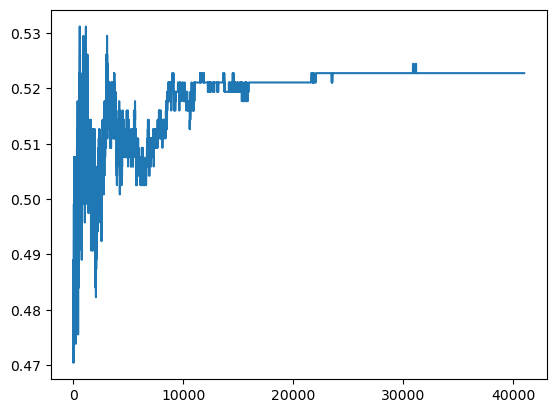

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/users/yyang22/thesis/aegnn_project/aegnn_results/async_accuracy.csv', delimiter=',')
plt.plot(data[:,0], data[:,1])

plt.savefig('/users/yyang22/thesis/aegnn_project/aegnn_results/async_accuracy.png')